<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/Modelling_a_Genrated_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate a fixed sequence of numbers and try finding the simplest, most accurate model 

#### 1. Generate the sequence of 1,000 numbers
#### 2. Split into 80% training + 20% testing 
#### 3. Try various models 
#### 4. Plot the estimates
#### 5. Fine tune the models 
#### 6. Try a bit of over fitting 
#### 7. Redo with some gaps in the data
#### 8. Redo with some added noise in the data 

**[Possible Tuning Methods for models]**

1. ***Change learning rate***
2. ***Change number of epochs***
3. ***Add dense layers***
4. ***Add neurons per layer*** 
5. ***Change activation function***
6. ***Change optimizer***
7. ***Change loss function***
8. ***Use more training data***


In [116]:
# Do the imports and initial setup 
# Need to have the following as global variables 
def my_setup() :
  global tf, np, plt, tfp
  import tensorflow as tf 
  import numpy as np 
  import matplotlib.pyplot as plt 
  import tensorflow_probability as tfp
  tf.random.set_seed(42)
  
 

In [114]:
# Function to show names and versions of the stuff I am using
def my_modules():
  print("tf =",tf.__version__,"| np =",np.__version__,"| tfp =",tfp.__version__)
#pip show tensorflow matplotlib numpy
#pip list 

In [152]:
# Function to do basic stats on a simple tensor 
def my_stats(data):
  print("Min = ",tf.math.reduce_min(data))
  print("Q25 = ",tfp.stats.percentile(data, 25))
  print("Q50 = ",tfp.stats.percentile(data, 50))
  print("Q90 = ",tfp.stats.percentile(data, 90))
  print("Max= ",tf.math.reduce_max(data))
  print("Mean = ",tf.math.reduce_mean(data))
  print("Std Dev = ",tfp.stats.stddev(data))
  print()

In [90]:
# Create plotting function
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  # The doc string 
  """
  Plots the training data and the ground truth vs the prediction
  """
  # Ctrl + Shift + space - will show the docstring in colb jupyter notebooks 
  plt.figure(figsize=(15,10))
  # Plot the training data in blue 
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  # Plot the test data in green
  plt.scatter(test_data,test_labels,c='g',label="Test data")
  # Plot the predictions in red 
  plt.scatter(test_data,predictions,c='r', label="Predictions")
  # Show legend
  plt.legend()

In [110]:
my_setup()


In [115]:
my_modules()

tf = 2.6.0 | np = 1.19.5 | tfp = 0.14.1


In [145]:
# Generate the dataset 
# X_train, y_train, X_test, y_test 
# Using tf.range

X = tf.range(start=1.0, limit=3000, delta=2)
y = tf.range(start=100.0, limit=3100, delta=2)
# y= X + 100
X.shape, y.shape


(TensorShape([1500]), TensorShape([1500]))

In [148]:
# Now split into training 1000 and test 500 
# Preserve the order initially 
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]
y_pred = y_test + 200


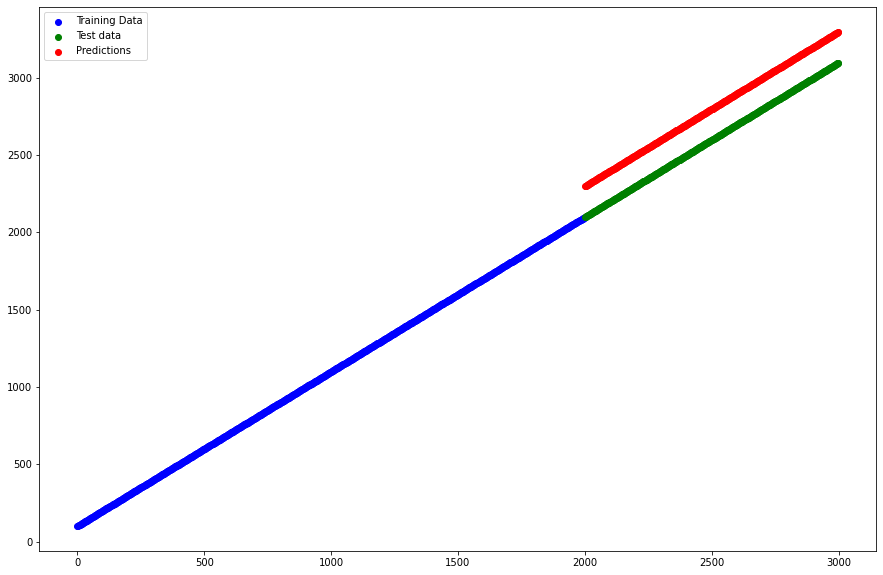

In [91]:
# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)


In [153]:
# Show basic stats
my_stats(X_train)
my_stats(X_test)
my_stats(y_train)
my_stats(y_test)


Min =  tf.Tensor(1.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(501.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1001.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1799.0, shape=(), dtype=float32)
Max=  tf.Tensor(1999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1000.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(577.35, shape=(), dtype=float32)

Min =  tf.Tensor(2001.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(2251.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(2501.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(2899.0, shape=(), dtype=float32)
Max=  tf.Tensor(2999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(2500.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(288.67456, shape=(), dtype=float32)

Min =  tf.Tensor(100.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(600.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1100.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1898.0, shape=(), dtype=float32)
Max=  tf.Tensor(2098.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1099.0, shape=(), dtype=fl

In [133]:
# Fit the first model 
# One layer 

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 1000)


Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 5007.2280 - mae: 5007.2280
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 5191.5093 - mae: 5191.5093
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 5039.9375 - mae: 5039.9375
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 4990.6528 - mae: 4990.6528
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 5088.1157 - mae: 5088.1157
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 4924.7759 - mae: 4924.7759
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 4991.1045 - mae: 4991.1045
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 4952.1245 - mae: 4952.1245
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 5020.1255 - mae: 5020.1255
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 5008.0557 - mae:

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fbc8a690200>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [134]:
# Predict and plot 
y_pred = model.predict(X_test)

